# Sampling

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine out what proportion of the population of DC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.



What do we want our sample to look like?

In particular, what relationship do we want between the sample and the population? What steps can we take to improve our odds of success in achieving this?

![pop](./img/sample_pop.png)

**Random sampling is not easy to do. Let's look at an example:**

Imagine you are trying to determine what proportion of DC metro area people own a car.

Here are two strategies we might employ:

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car

Which strikes you as better?

When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.

##### Population v Sample Terminology
Characteristics of populations are called *parameters*

Characteristics of a sample are called *statistics*

![imgsample](./img/sample_stats.png)

## Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution! 

## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./img/probability-basics.gif)

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

### An Example
A bicycle advocacy group has come to us to see if it would make sense to increase the length of time users of Capital Bike Share have to ride on their bikes before they have to return them. Let's analyze a collection of Capital Bike Share data to determine if we should lengthen the time people have with their bikes.

Let's head over [here](https://s3.amazonaws.com/capitalbikeshare-data/index.html) for some DC bike data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('202003-capitalbikeshare-tripdata.csv')

In [2]:
df.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
162525,673,2020-03-31 23:17:58,2020-03-31 23:29:12,31235,19th St & Constitution Ave NW,31265,5th St & Massachusetts Ave NW,W22920,Member
162526,514,2020-03-31 23:18:13,2020-03-31 23:26:47,31203,14th & Rhode Island Ave NW,31324,18th & New Hampshire Ave NW,21054,Member
162527,1524,2020-03-31 23:29:00,2020-03-31 23:54:25,31110,20th St & Florida Ave NW,31403,5th & Kennedy St NW,W24341,Member
162528,565,2020-03-31 23:41:17,2020-03-31 23:50:43,31603,1st & M St NE,31256,10th & E St NW,W22691,Member
162529,1054,2020-03-31 23:45:05,2020-04-01 00:02:40,31325,Reservoir Rd & 38th St NW,31214,17th & Corcoran St NW,W24051,Member


In [3]:
trip_durations = df['Duration'] / 60
trip_durations_2hr = trip_durations[trip_durations < 2*60]

#### The length of a bike ride

What shape do you expect the distribution of trip durations to have?

#### Get population statistics

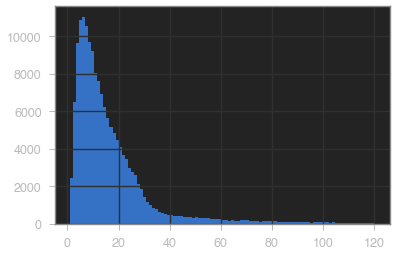

In [4]:
trip_durations_2hr.hist(bins=100);

In [5]:
trip_durations_2hr.median()

12.083333333333334

Let's treat the whole dataset as our population.

In [6]:
pop_mean = trip_durations.mean()
pop_std = trip_durations.std()
print(f'pop_mean is {pop_mean} \npop_std is {pop_std}')

pop_mean is 18.978877745646955 
pop_std is 36.471735963614115


#### When we take multiple samples from the distribution, and plot the means of each sample, the shape of the curve shifts.

![means](./img/meansofsamples.png)

#### The number of samples drives the shape of the curve more than the sample size itself

![moremeans](./img/moresamplescurve.png)

**Fewer samples**
![lesssamples](./img/lesssamplescurve.png)

### Let's confirm with code ourselves!

In [7]:
def one_sample_mean(population):
    sample = np.random.choice(population, size=200, replace=True)
    return sample.mean()

In [10]:
one_sample_mean(trip_durations_2hr)

14.947750000000001

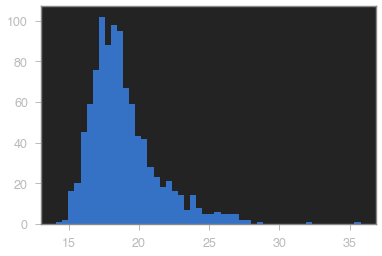

In [11]:
d = [one_sample_mean(trip_durations) for i in range(1000)]
plt.hist(d, bins=50);

In [17]:
import seaborn as sns
sns.set_style('ticks')

def central_limit_theorem_plotter(distribution, sample_size, num_samples):
    sample_means = np.zeros(num_samples)
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means, bins=80, kde=True)
    title = f'Sample Distribution n = {sample_size} and number of samples = {num_samples},\
    std error = {pop_std / num_samples}'
    print(f'mean = {sample_means.mean()}')
    plt.title(title)

mean = 18.979285463333333


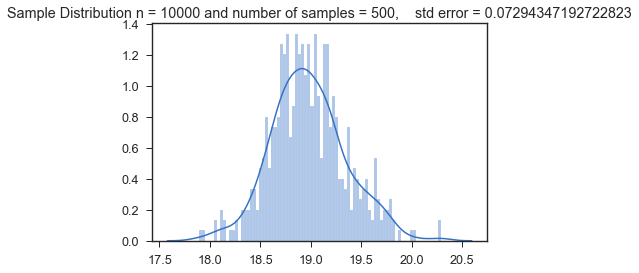

In [18]:
central_limit_theorem_plotter(trip_durations, 10000, 500);

mean = 19.486463333333333


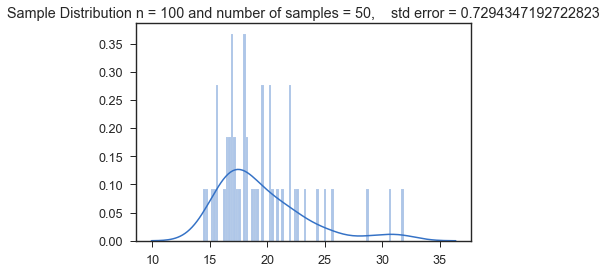

In [19]:
central_limit_theorem_plotter(trip_durations, 100, 50);

* What happens as we increase the sample size?
* How does the height of the distribution change? Why does it change?

### Show with exponential

In [20]:
exponential =np.random.exponential(scale= 1, size=1000)

(array([183., 103., 102.,  82.,  76.,  64.,  52.,  56.,  35.,  42.,  40.,
         24.,  18.,  19.,  17.,  18.,   7.,   4.,   9.,   3.,  11.,   8.,
          7.,   3.,   4.,   1.,   3.,   1.,   1.,   0.,   2.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.38269308e-03, 1.59332227e-01, 3.17281761e-01, 4.75231295e-01,
        6.33180829e-01, 7.91130363e-01, 9.49079897e-01, 1.10702943e+00,
        1.26497897e+00, 1.42292850e+00, 1.58087803e+00, 1.73882757e+00,
        1.89677710e+00, 2.05472664e+00, 2.21267617e+00, 2.37062570e+00,
        2.52857524e+00, 2.68652477e+00, 2.84447431e+00, 3.00242384e+00,
        3.16037337e+00, 3.31832291e+00, 3.47627244e+00, 3.63422198e+00,
        3.79217151e+00, 3.95012104e+00, 4.10807058e+00, 4.26602011e+00,
        4.42396965e+00, 4.58191918e+00, 4.73986872e+00, 4.89781825e+00,
        5.05576778e+00, 5.21371732e+00, 5.37166685e+00, 5.52961639e+00,
        5.

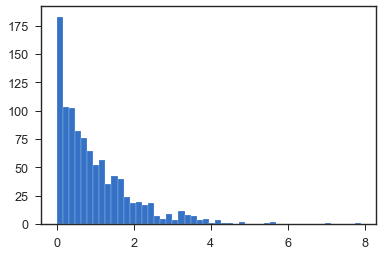

In [21]:
plt.hist(exponential, bins=50)

mean = 0.9755377239570021


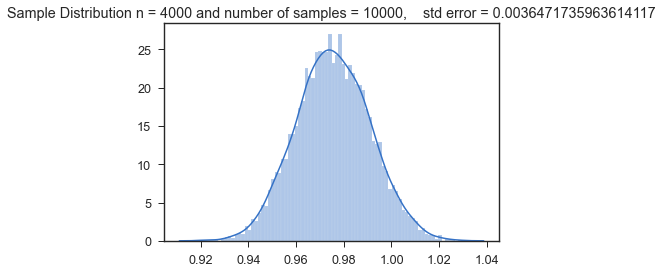

In [22]:
central_limit_theorem_plotter(exponential, 4000, 10000)

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for that fact in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma** <br/>

$\large\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate it by using the sample standard deviation.

$\large\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.
